01-3

# 01-3. 마켓과 머신러닝


생선 데이터셋  출처<br>
https://www.kaggle.com/aunpyaeap/fish-market


In [ ]:
#도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

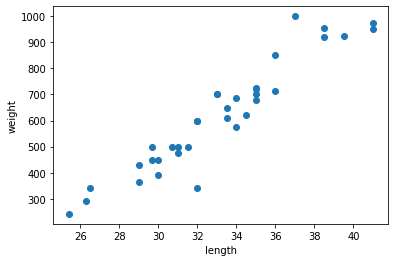

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

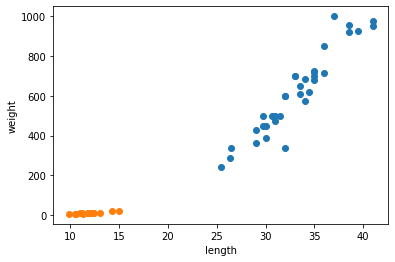

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#2차원 리스트로 변환
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
#도미와 빙어 분리하기
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 모듈 삽입
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 훈련한 머신으로 예측하기
kn.predict([[30, 600]])
print(kn.predict([[15, 150]]))

# 참고데이터를 49개로 한 kn49모델
kn49 =KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

[0]


0.7142857142857143

# 02-1. 훈련 세트와 테스트 세트

In [ ]:
#도미와 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# train, test 데이터 분리
train_input = fish_data[ :35]
train_target = fish_target[ :35]
test_input = fish_data[35: ]
test_target = fish_target[35:]

# 모델링, 평가하기
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 무작위로 섞어주기, 42는 변수
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

#print(index)

#무작위로 섞인 훈련 세트 만들기
train_input = input_arr[index[ :35]]
train_target = target_arr[index[ :35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

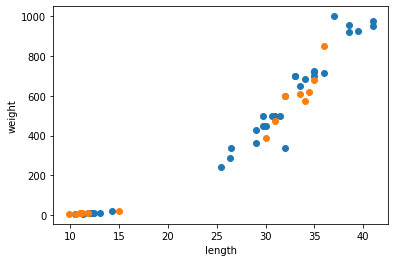

In [ ]:
#무작위로 섞인 데이터 시각화 해보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

kn.predict(test_input)


1.0


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#02-2. 데이터 전처리


In [ ]:
#도미와 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

column_stack() 함수<br>
* 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결, 연결할 리스트는 튜플(turple)로 전달 <br>

concatenate() 함수<br>
* 전달받은 리스트를 첫번째 차원에 따라 연결함<br>


In [ ]:
import numpy as np

#column_stack 함수 예시
np.column_stack(([1,2,3], [4,5,6]))


fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


ones() 함수 <br>
* 원하는 개수의 1를 채운 배열 <br>

zeros() 함수<br>
* 원하는 개수의 0을 채운 배열

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


train_test_split 사용하기 <br>
* train/test data를 무작위로 나눠줌
* parameter 설명
 * test_size - 기본은 0.25를 테스트데이터로 설정함
 * stratify - 타깃 데이터(Y값)를 입력하면 클래스 비율에 맞게 데이터를 나눔 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target
                                                                      ,random_state = 42)
#데이터셋의 크기 확인
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify 적용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target
                                                                      ,stratify = fish_target
                                                                      ,random_state = 42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#K-최근접 이웃 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#다시 도미와 빙어를 분류해보기
print(kn.predict([[25, 150]]))

[0.]


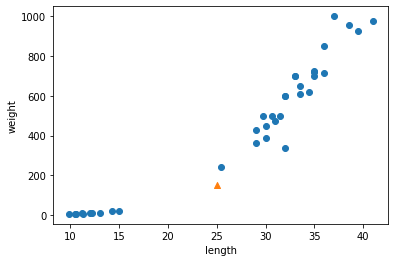

In [ ]:
#산점도
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kneighbors() 메서드<br>
* 주어진 샘플에서 가장 가까운 이웃을 찾아주는 메서드
* 이웃까지의 거리와 이웃 샘플의 인덱스를 반환


Text(0, 0.5, 'weight')

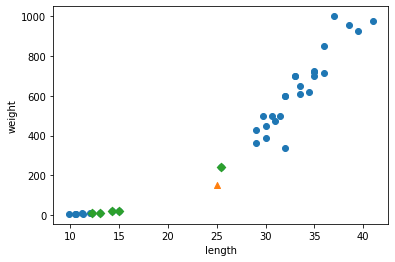

In [ ]:
# 길이 25, 무게 150의 데이터의 재검수

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(train_input[indexes]) #데이터로 보기

print(train_target[indexes]) #타깃 데이터

print(distances) #거리를 조절하는 하이퍼 파라미터가 필요함

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


Text(0, 0.5, 'weight')

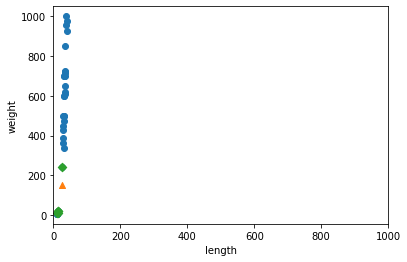

In [ ]:
# x축의 범위를 0~1000으로 맞춰 범위를 재지정

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim(0, 1000) #축 범위가 auto가 아닌 상수로
plt.xlabel('length')
plt.ylabel('weight')

브로드캐스팅(broadcasting)<br>
* 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


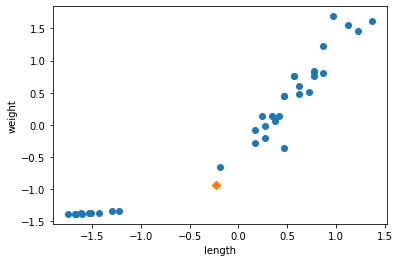

In [ ]:
#표준점수로 변환, 비교
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

#.넘파이 배열에서는 브로드캐스팅(broadcasting)
train_scaled = (train_input - mean) / std

#표준화한 값으로 그래프
plt.scatter(train_scaled[:,0], train_scaled[:,1])
#25,150도 scale을 맞춰줘야 함
new = ([25,150] - mean) / std
plt.scatter(new[0], new[1], marker= 'D')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
#재학습
kn.fit(train_scaled, train_target)

# 모델 평가
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 최종 25, 150의 값을 예측해보기
print(kn.predict([new]))

[1.]


# 03-1. k-최근접 이웃 회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

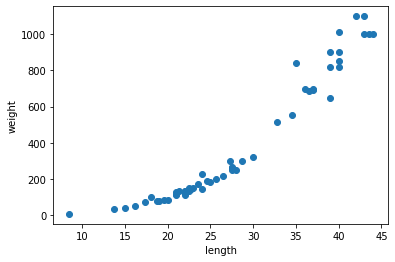

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight
                                                                    ,random_state = 42)

reshape() 메서드 <br>
* 2차원 배열로 바꿔주는 메서드
* 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우는 의미
* 바꾸기 전후의 배열의 원소 개수는 같아야함

In [ ]:
# 사이킷런의 훈련세트는 2차원 배열이어야 하나, 이번 데이터셋은 1차원 배열이므로 이를 바꿔주는 함수 사용
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


결정계수(R) <br>
* 회귀는 결정계수로 평가<br>

<br>
score() 메서드의 출력값의 의미<br>
* 사이킷런의 score() 메서드가 출력하는 값은 높을수록 좋은 것 <br>


In [ ]:
# k-최근접 이웃 회귀 알고리즘으로 테스트
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

#k-최근접 이웃 회귀모델을 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


과대적합 vs 과소적합<br>

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# 이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

#모델의 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# 테스트세트의 점수 확인
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


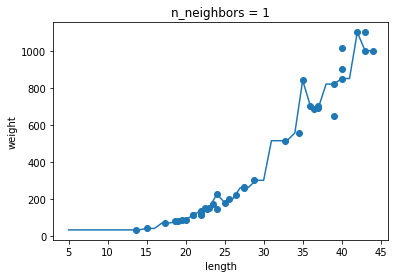

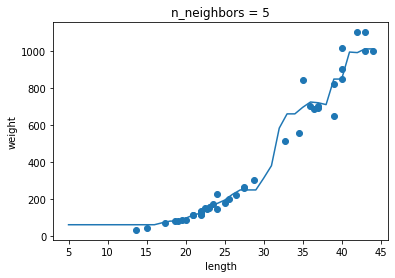

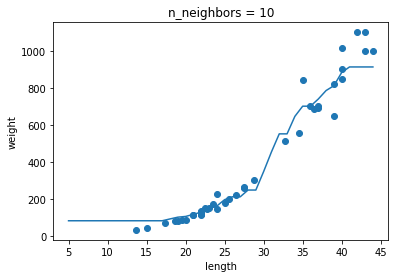

In [ ]:
#k-최근접 이웃 회귀 - k값 비교
#k-최근접 이웃 회귀 객체를 만듭니다.
import numpy as np
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듭니다.
x = np.arange(5, 45).reshape(-1,1)

# n = 1, 5, 10일때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
  #모델을 훈련합니다.
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  
  prediction = knr.predict(x)
  
  #훈련 세트와 예측 결과를 그래프로 그립니다.
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# 03-2. 선형회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight
                                                                      ,random_state = 42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

#k-최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델 훈련합니다.
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

##실제 농어의 무게는 이보다 더 나감, 어디서 문제가 발생한 것일까?

[1033.33333333]


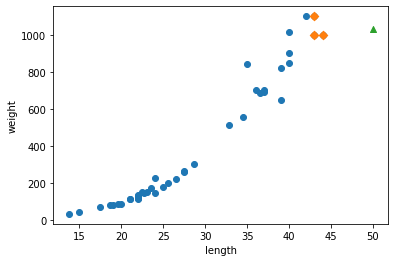

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
# 45cm 근방의 세 개의 샘플의 무게의 평균은?
print(np.mean(train_target[indexes]))

# 그럼 100cm 농어의 무게는?
print(knr.predict([[100]]))

# 그럼 150cm 농어의 무게는?
print(knr.predict([[150]]))

# 학습데이터 이상을 예측하지 못함 -> 선형회귀의 필요성

1033.3333333333333
[1033.33333333]
[1033.33333333]


선형회귀
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

# LinearRegression 기울기와 절편 찾기
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


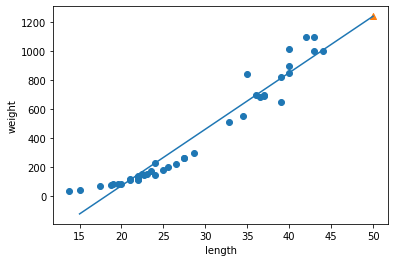

In [ ]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트에 대한 결정계수 점수 확인
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트



0.939846333997604
0.8247503123313558


다항 회귀

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


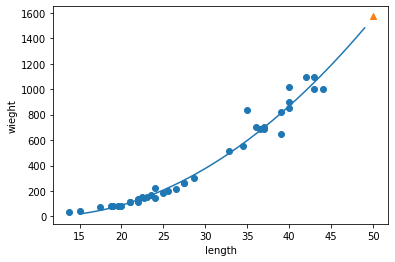

In [ ]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('wieght')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트의 결정계수 점수 평가

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 03-3. 특성 공학과 규제


In [ ]:
#pandas 활용하기
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight,
                                                                      random_state=42)
